# **World Happiness Score**





## **Importing the data**

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [49]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [50]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [51]:
df.shape

(158, 12)

In [52]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

## EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



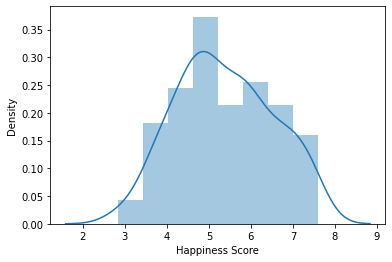

In [53]:
sns.distplot(df['Happiness Score'])

In [54]:
print(df['Region'].value_counts())

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64


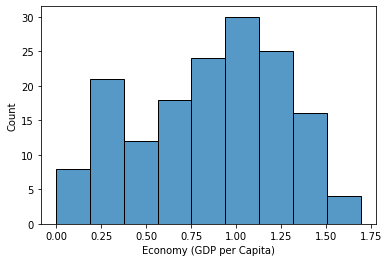

In [55]:
sns.histplot(df['Economy (GDP per Capita)'])

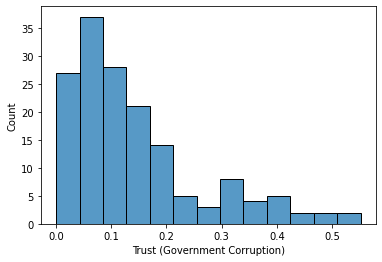

In [56]:
sns.histplot(df['Trust (Government Corruption)'])

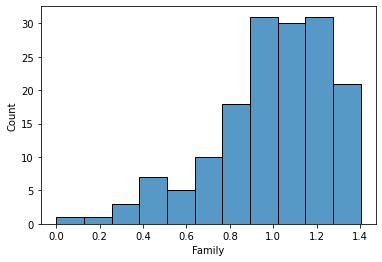

In [57]:
sns.histplot(df['Family'])

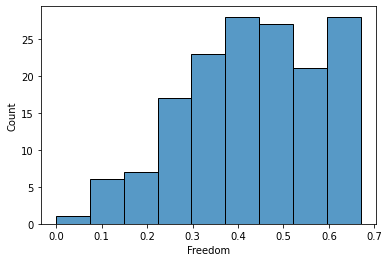

In [58]:
sns.histplot(df['Freedom'])

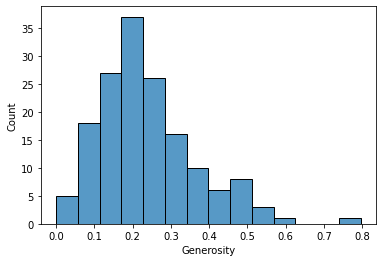

In [59]:
sns.histplot(df['Generosity'])

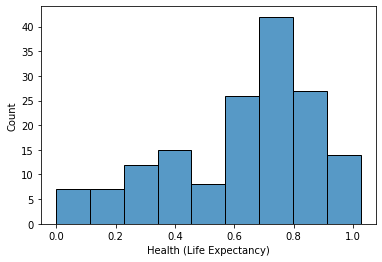

In [60]:
sns.histplot(df['Health (Life Expectancy)'])

## World Map of Happiness Rank

In [61]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

data = dict(type = 'choropleth', locations=df['Country'], locationmode='country names', z=df['Happiness Score'], 
            text=df['Country'],colorbar={'title':'Happiness'})
layout = dict(title = 'Global Happiness 2017', geo=dict(showframe = False))
choromap3 = go.Figure(data=[data], layout=layout)
iplot(choromap3)

**Inferences :**

1) Almost All the countries in North America, South America, Australia and Western Europe have very high Happiness Score

2) most of the countries in Africa, Eatern Europe and Southern Asia have low Happiness Score

3) All the countries in Northern Asia have moderate Happiness Score

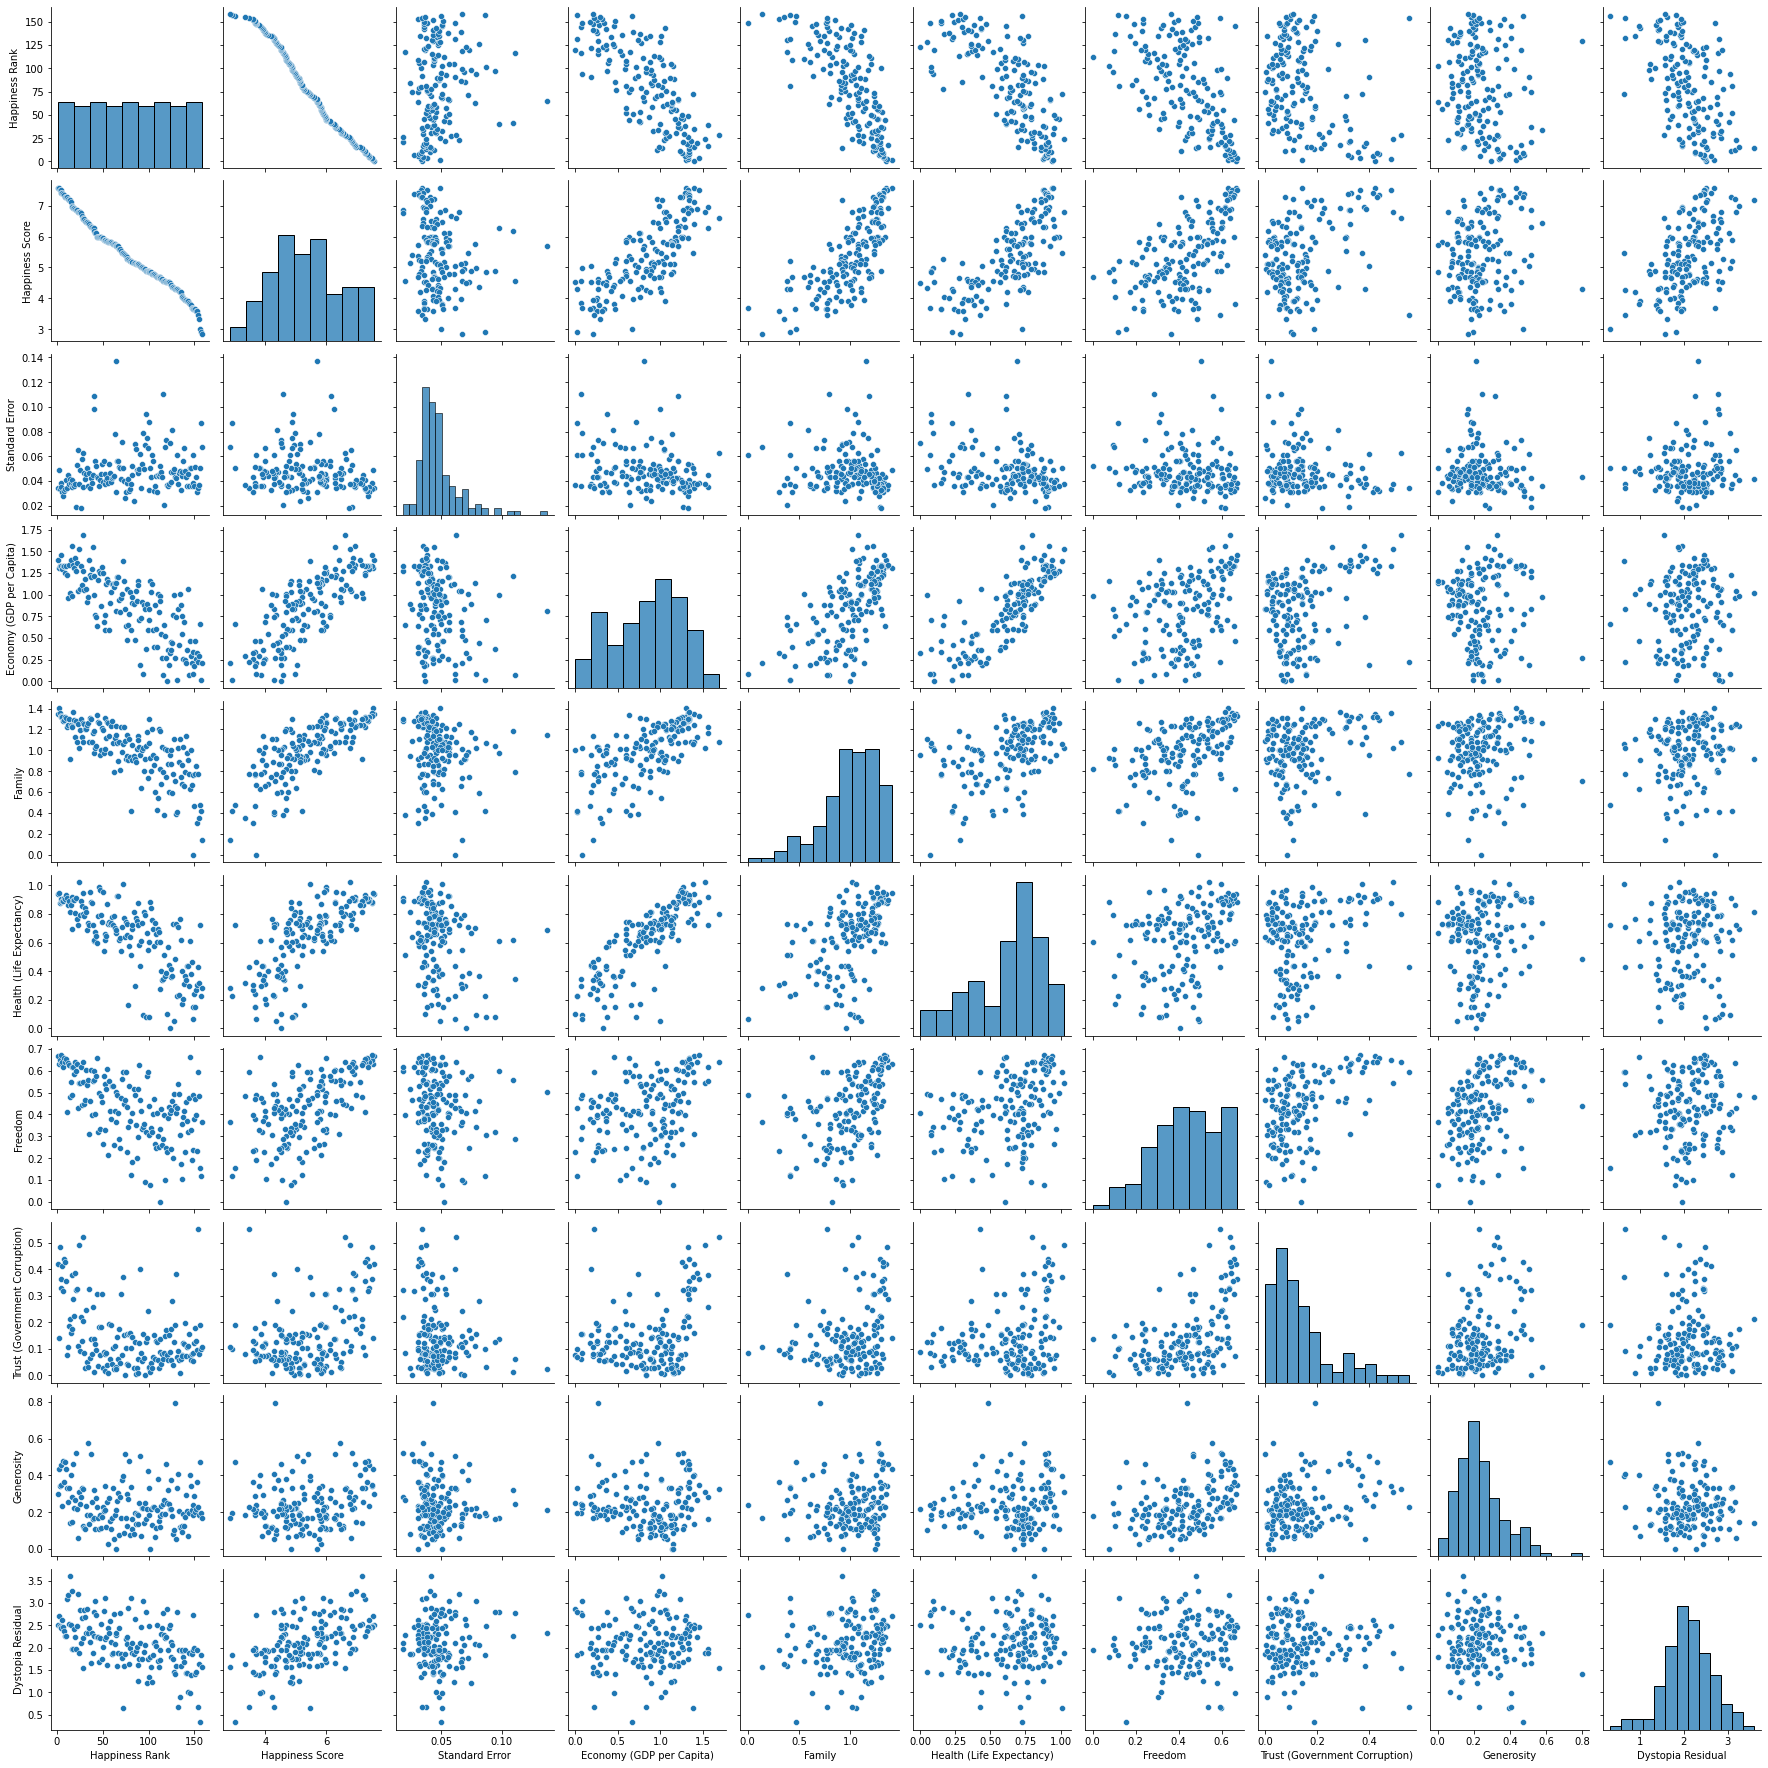

In [62]:
sns.pairplot(df)

In [63]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


### correlation between data

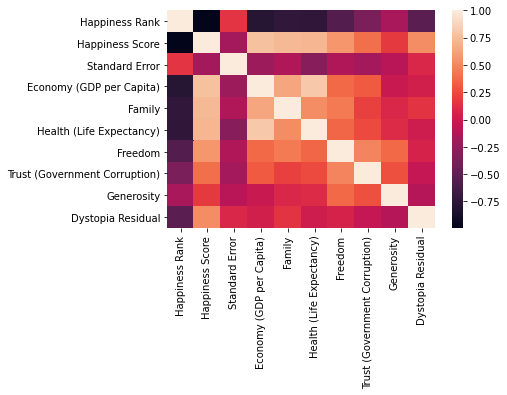

In [64]:
corrmat = df.corr()

sns.heatmap(corrmat)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

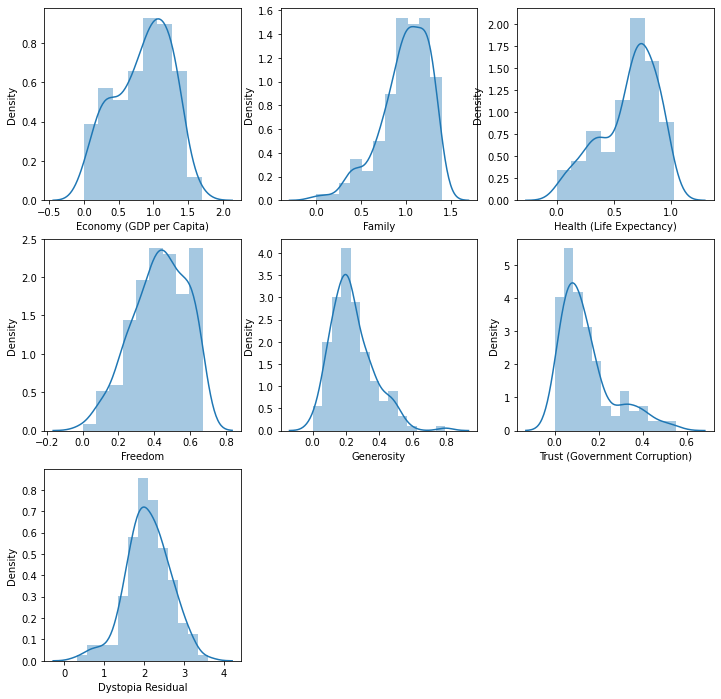

In [65]:
happiness_factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Generosity', 'Trust (Government Corruption)', 
           'Dystopia Residual']

def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        sns.distplot(data[column])

plt.figure(figsize=(12,12))
plot_columns_on_grid(df, happiness_factors, (3, 3))

**Inference:**

  some of the data like family,trust,Generosity are skewed.Some of the distributions look like we have at least two distinct groups of countries. For example the Health data has the majority clustered around 0.7 but also a second group of countries around 0.3.

In [66]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

### happiness score vs continents

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



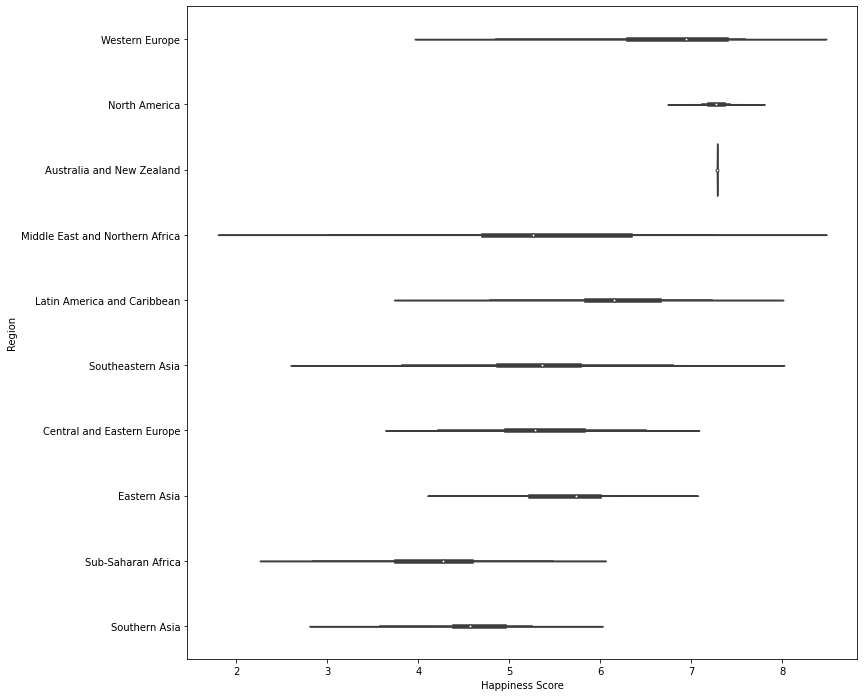

In [86]:
# happiness score vs continents

plt.rcParams['figure.figsize'] = (12, 12)
sns.violinplot(df['Happiness Score'], df['Region'])
plt.show()


### **Linear fitting of the Happiness score in terms of the 6 factors**

Spliting x and y variable

In [67]:
Y = df['Happiness Score']
X = df.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region'], axis=1)

In [68]:
X.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [69]:
Y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

test train split

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

In [71]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
print("model coeff    =    ",lm.coef_)
print("model intercept    =     ",lm.intercept_)

model coeff    =     [-6.62640689e-04  1.00012756e+00  9.99809853e-01  9.99984279e-01
  9.99719976e-01  9.99885249e-01  9.99747287e-01  9.99955045e-01]
model intercept    =      0.0004013323028209115


In [73]:
predictions = lm.predict( X_test)
print("Predicted result price: ",predictions)
print("actual  price",Y_test)

Predicted result price:  [4.2707438  6.12271796 5.83268401 4.8577103  6.45453951 3.7807999
 5.25276766 3.89662325 6.94619608 5.36031616 4.51229833 5.00708623
 6.2692078  5.70878245 5.85522848 5.12881716 5.1937551  5.68879081
 7.42678019 7.56074954 6.47670782 5.12425961 6.13012611 5.88968665
 3.00644144 6.48508376 4.21861884 4.83934205 3.34016694 2.83909529
 3.90379867 4.89742702 4.87599388 5.95967681 5.54813853 4.64229801
 4.29244248 5.58860538 6.75011376 4.69405469 3.81930762 4.51775379
 5.12316384 4.30688469 3.98889628 4.95946562 5.05711843 6.00265085]
actual  price 131    4.271
42     6.123
55     5.833
101    4.857
33     6.455
145    3.781
78     5.253
142    3.896
16     6.946
74     5.360
121    4.512
92     5.007
39     6.269
64     5.709
53     5.855
84     5.129
80     5.194
66     5.689
4      7.427
1      7.561
32     6.477
85     5.124
41     6.130
50     5.890
155    3.006
31     6.485
133    4.218
102    4.839
154    3.340
157    2.839
141    3.904
96     4.898
98     4.

Text(0, 0.5, 'Predicted Y')

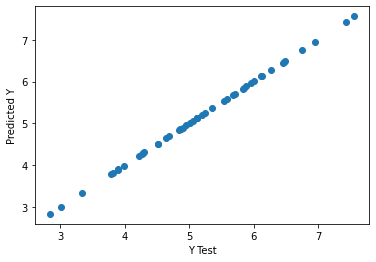

In [74]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [75]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Standard Error,-0.000663
Economy (GDP per Capita),1.000128
Family,0.999810
Health (Life Expectancy),0.999984
Freedom,0.999720
Trust (Government Corruption),0.999885
Generosity,0.999747
Dystopia Residual,0.999955


**Inference:**

Happiness score is a perfect linear plot of the factors with the coefficients given in the table above

### **Regional Influence of factors as a heat map**

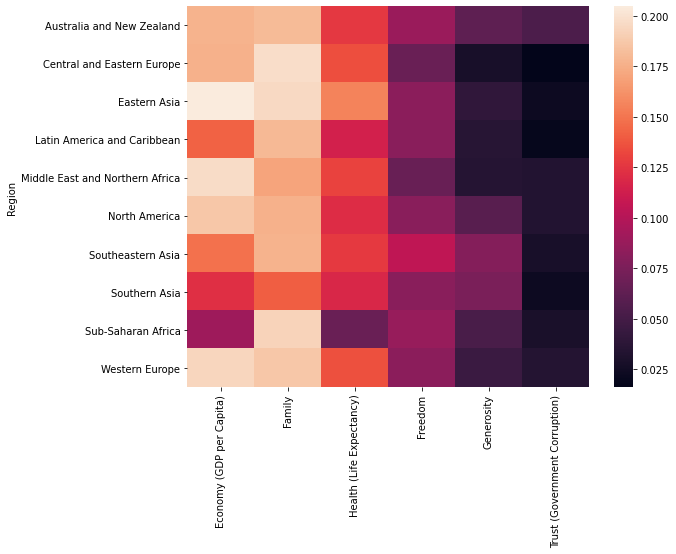

In [76]:
by_region = df.groupby('Region')

f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(by_region[happiness_factors[:-1]].mean().div(by_region['Happiness Score'].mean(), axis='index'))

### Inference:

Order of dependency of Happiness Score is observed as : Economy > Family > Health > Freedom > Generosity > Trust.

### **Scatter Plot of Happiness Score Vs Factors Corresponding to it**

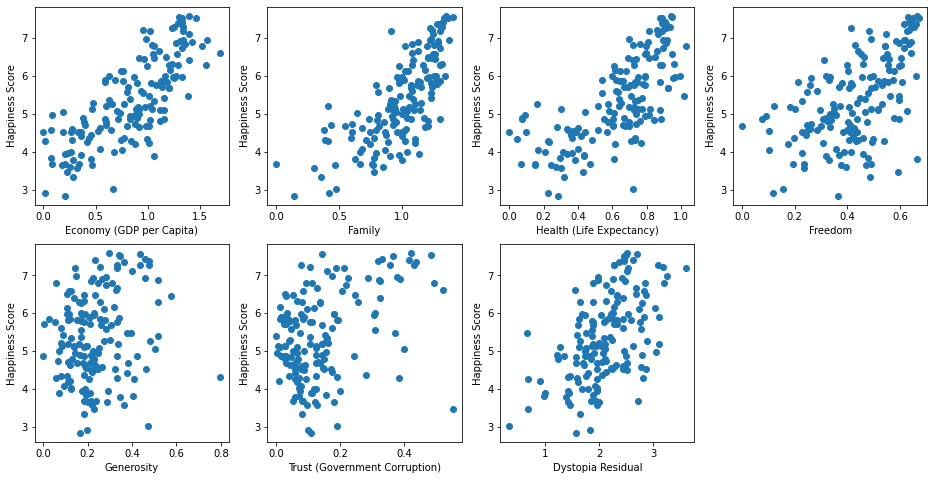

In [77]:
happiness_factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Generosity', 'Trust (Government Corruption)', 
           'Dystopia Residual']

def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        plt.scatter(data[column],df['Happiness Score'])
        plt.xlabel(column);
        plt.ylabel('Happiness Score');

plt.figure(figsize=(16,8))
plot_columns_on_grid(df, happiness_factors, (2, 4))

Inference:
1. The factors like economy and family are playing major role for happiness score

2. Generosity and Trust are the least important factors.

3. The order of happiness score goes from economy,family,Health,Freedom ,Generosity,Trust.

## Clustering Analysis

Normalizing data using the total happiness score

In [78]:
df_norm = df
df_norm[happiness_factors] = df_norm[happiness_factors].div(df['Happiness Score'].values, axis=0)

**K-mean clustering**

In [79]:
from sklearn.cluster import KMeans
cluster_n = 3
k_means = KMeans(init='k-means++', n_clusters=cluster_n, n_init=10)
cluster_labels = k_means.fit_predict(df_norm[happiness_factors[:-1]])

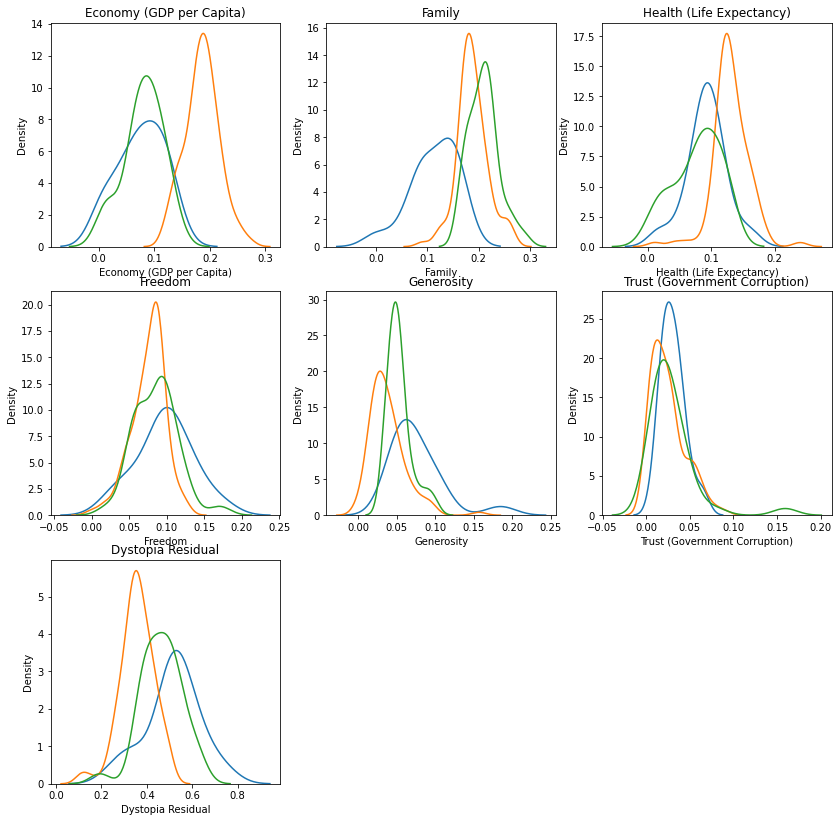

In [80]:
plt.figure(figsize=(14,14))
for i, factor in enumerate(happiness_factors):
    ax = plt.subplot(3, 3, i+1)
    for cluster in range(cluster_n):
        sns.kdeplot(df_norm.loc[cluster_labels == cluster, factor],label=cluster)
        ax.set_title(factor)

### **Comparing the happiness score distribution for the clusters**

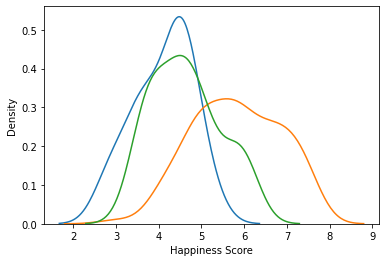

In [81]:
for cluster in range(cluster_n):
    sns.kdeplot(df.loc[cluster_labels == cluster, 'Happiness Score'], label=cluster)


Inferences :


1) There is a big difference between the happiness score distributions of the clusters

2) It can be plotted on globe to get more information about the clusters .